In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.rcParams["figure.figsize"] = [20,10]
def set_font(s, reset=False):
    if reset:
        plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams["figure.figsize"] = [20,10]
#     plt.rcParams['font.family'] = 'serif'
#     plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
    plt.rc('font', size=s)          # controls default text sizes
    plt.rc('axes', titlesize=s)     # fontsize of the axes title
    plt.rc('axes', labelsize=s)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=s-2)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=s-2)    # fontsize of the tick labels
    plt.rc('legend', fontsize=s)    # legend fontsize
    plt.rc('figure', titlesize=s)  # fontsize of the figure title
set_font(20)

# Experiment I. Heirarchical

In [3]:
# Construct test case with Sale BPs with different tax rates
def generate_sales_df(N=2, taxes=[0.02, 0.15, 0.35]):
    if taxes is not None:
        tax_rates = taxes
    if N is not None:
        N = N
    cur_id = 0
    data = pd.DataFrame(columns=["ID", "FA_Name", "Journal", "Date", "Debit", "Credit"])
    for tax in tax_rates:
        for _ in range(N):
            #generate amounts
            rev = random.randint(10,1000)
            t = rev*tax+random.randint(2, 10)
            tr = rev+t
            data = data.append([pd.Series([cur_id, "Revenue", "Sales ledger", "01/01/2017", 0.0, rev], index=data.columns), 
                        pd.Series([cur_id, "Tax", "Sales ledger", "01/01/2017", 0.0, t], index=data.columns), 
                        pd.Series([cur_id, "Trade Receivables", "Sales ledger", "01/01/2017", tr, 0.0], index=data.columns)]
                        , ignore_index=True)
            cur_id+=1
    return data

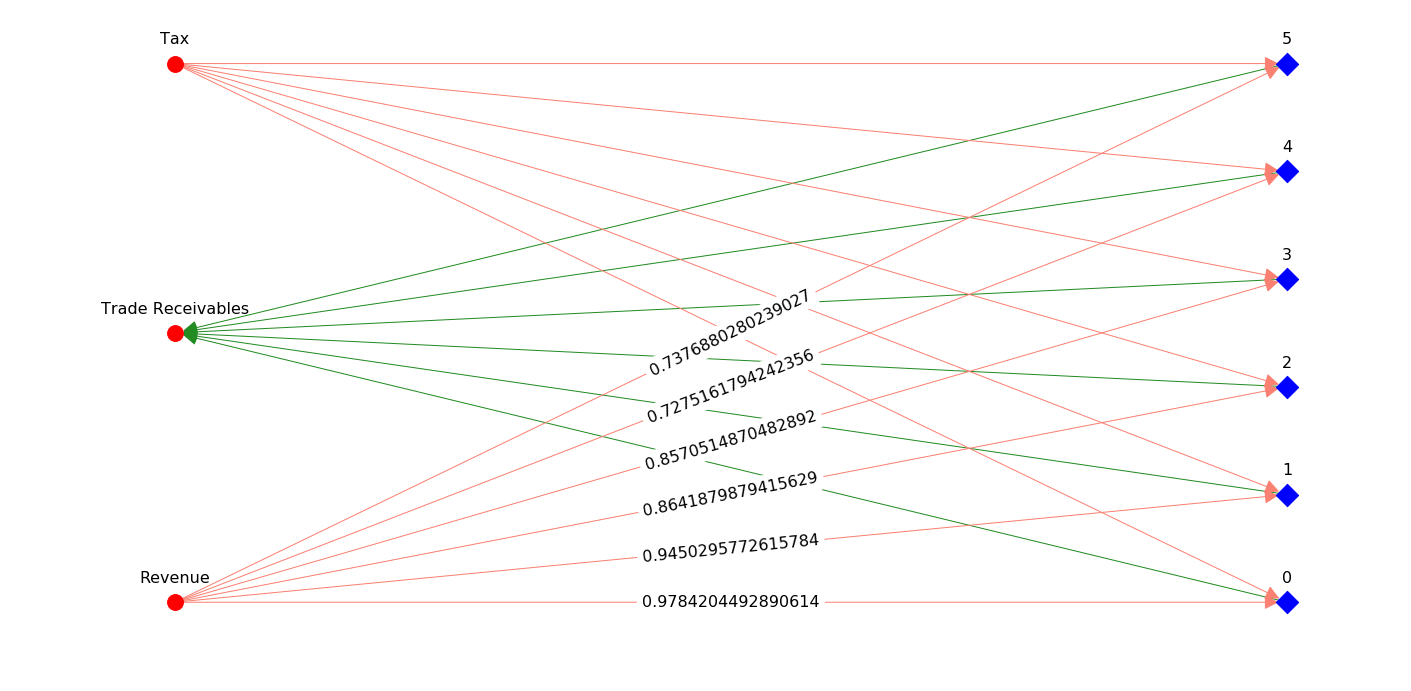

In [5]:
from NetEmbs.DataProcessing import *
from NetEmbs.FSN.graph import FSN
generated_data = prepare_data(generate_sales_df())
fsn = FSN()
fsn.build(generated_data, name_column="FA_Name")
fsn.nodes()
from NetEmbs.Vis.plots import plotFSN
plotFSN(fsn, edge_labels="Revenue", node_labels=True, title="Proof_1")

In [5]:
import seaborn as sns
from collections import Counter
def plot_heatmap(pairs, title="HeatMap", size=6, norm="col", return_hm=False, absolute_vals = False, debug=False):
    cnt = dict(Counter(pairs))
    heatmap_data = np.zeros((size,size))
    if debug:
        print(cnt)
    for key, item in cnt.items():
        heatmap_data[key] = item
    if norm=="row":
        if not absolute_vals:
            heatmap_data = preprocessing.normalize(heatmap_data, axis=1, norm="l1")
        sns.heatmap(heatmap_data, annot=True, cmap="Blues")
    elif norm=="col":
        if not absolute_vals:
            heatmap_data = preprocessing.normalize(heatmap_data, axis=0, norm="l1")
        mask = np.zeros_like(heatmap_data)
        mask[np.triu_indices_from(mask)] = True
        sns.heatmap(heatmap_data, mask=mask, annot=True, cmap="Blues")
    if title is not None and isinstance(title, str):
        plt.tight_layout()
        plt.savefig("img/"+title, dpi=140, pad_inches=0.01)
    plt.show()
    if return_hm:
        return heatmap_data

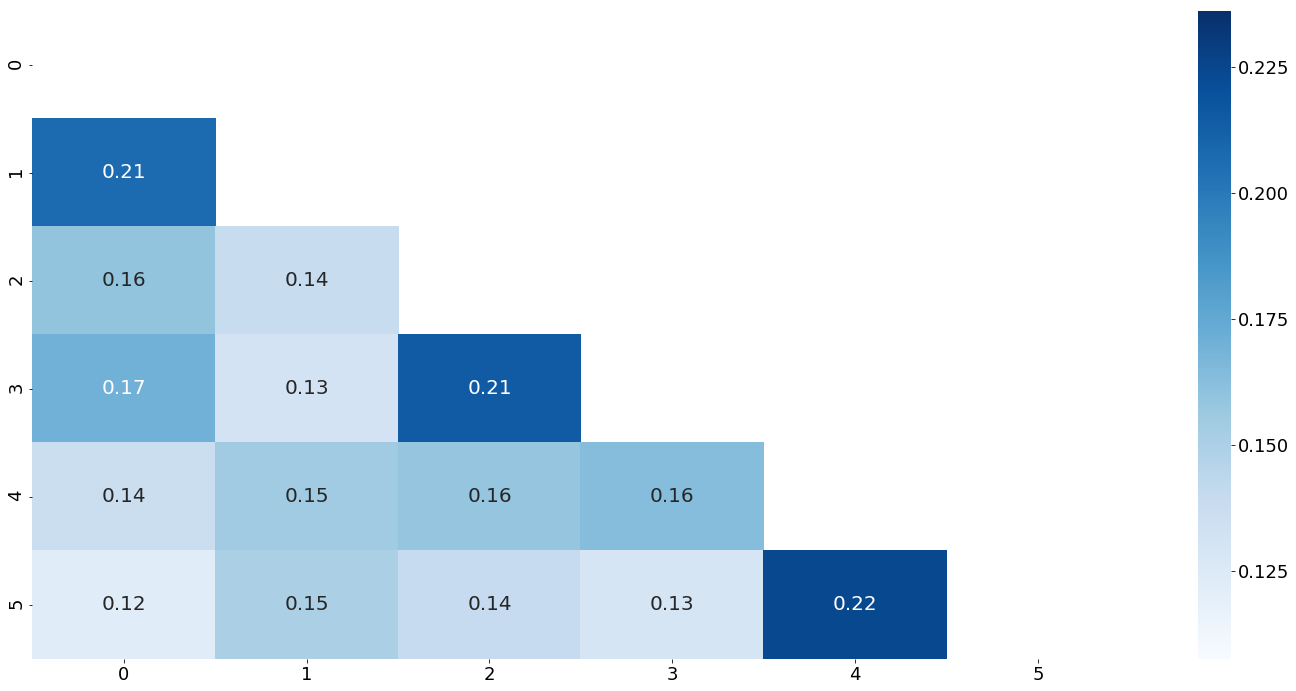

In [16]:
from NetEmbs.FSN.utils import *
pairs = [make_pairs(randomWalk(fsn, node, 10, direction="COMBI")) for _ in range(20) for node in range(6)]
pairs = [item for sublist in pairs for item in sublist]
plot_heatmap(pairs, norm="col")